# Homework 1 Submission

## 1. Read the CSV file into a pandas dataframe. (1 pt)

## Ans 1)

### Below code simply reads the data from the URL and checks if everything worked well by displaying the first few rows

In [1]:
import pandas as pd

bike_data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD')


In [2]:
bike_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


## 2. Add columns to the dataframe containing: ( 3 pt)
### i) The total (East + West) bicycle count
### ii) The hour of the day
### iii) The year

## Ans 2)

### i) The next line creates a new column 'East + West' which is the sum of counts for East and West sidewalk bikes

In [3]:
bike_data['East + West'] = bike_data['Fremont Bridge East Sidewalk'] + bike_data['Fremont Bridge West Sidewalk']

## Next we check the data-types of the columns and notice that Date is an object. We convert it to a datetime column and then it is easy to extract the 'Year' and 'Hour' fields as shown below.

In [4]:
bike_data.dtypes

Date                             object
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
East + West                     float64
dtype: object

In [5]:
bike_data['Date'] = pd.to_datetime(bike_data['Date'])
bike_data.dtypes

Date                            datetime64[ns]
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
East + West                            float64
dtype: object

In [6]:
bike_data['Year'], bike_data['Hour'] = bike_data['Date'].dt.year, bike_data['Date'].dt.hour

### Just ensure that these columns have been added as expected by viewing the first few rows

In [7]:
bike_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,East + West,Year,Hour
0,2019-03-31 23:00:00,6.0,10.0,16.0,2019,23
1,2019-03-31 22:00:00,7.0,14.0,21.0,2019,22
2,2019-03-31 21:00:00,18.0,15.0,33.0,2019,21
3,2019-03-31 20:00:00,26.0,31.0,57.0,2019,20
4,2019-03-31 19:00:00,30.0,58.0,88.0,2019,19


## 3. Create a dataframe with the subset of data from the year 2016 (1 pt)

## Ans 3)

### Below code creates the subset of data from the year 2016 and the code after that simply verifies this.

In [8]:
bike_data_2016 = bike_data[bike_data['Year']==2016]

In [9]:
print("Number of rows in original dataset = ", len(bike_data.index))
print("Number of rows in the subset of data from the year 2016 = ", len(bike_data_2016.index))

print("Number of unique values of year column in the subset data = ", len(bike_data_2016['Year'].unique()))

Number of rows in original dataset =  56904
Number of rows in the subset of data from the year 2016 =  8784
Number of unique values of year column in the subset data =  1


## 4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

## Ans 4)

### Below is a scatter type plot of Total Daily Counts by the hour of the day

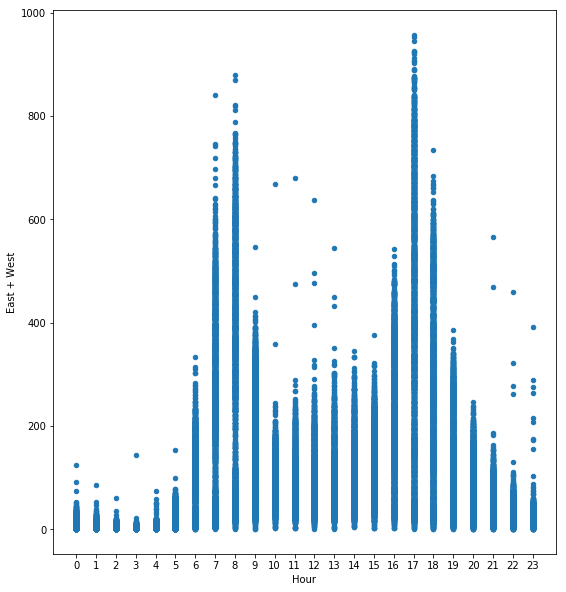

In [11]:
import matplotlib.pyplot as plt
bike_data.plot(x='Hour',y='East + West',kind='scatter',figsize=(9,10),xticks=range(0,24,1))
pt = plt.show()

## 5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)

## Ans 5)

### We group the data by the 'Hour' field and then get the index of the row where the value of total bikes (on average) is the maximum in the day. This corresponds to the busiest hour of the day, which is found out to be between 5 pm and 6 pm.

In [12]:
bike_data_groupByHour = bike_data.loc[:,['East + West','Hour']].groupby(by=['Hour']).mean()
bike_data_groupByHour

,East + West
Hour,
0,11.632644
1,6.113876
2,4.080727
3,2.983551
4,6.557149
5,25.799241
6,90.043442
7,225.537326
8,317.905103


In [13]:
bike_data_groupByHour['East + West'].idxmax()

17